In [1]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import load_img, img_to_array

In [2]:
import numpy as np

In [4]:
model=VGG16()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
model1=VGG16(include_top=False)
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [7]:
img_path="/Users/gunnvantsaini/Documents/Work/Machine Learning Course/Python/Module 5 Neural Networks/Codes/pizza.jpg"
img=load_img(img_path,target_size=(224,224))
img_arr=img_to_array(img)
img_arr=np.expand_dims(img_arr,axis=0)
img_pre_processed=preprocess_input(img_arr)

In [8]:
pred=model1.predict(img_pre_processed)

In [9]:
pred.shape

(1, 7, 7, 512)

### The output is 512 arrays of dim 7 by 7, lets visualize one of these arrays

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

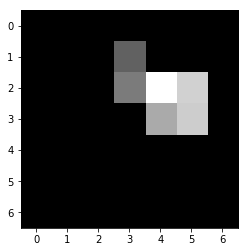

In [14]:
plt.imshow(pred[:,:,:,0].reshape(7,7),cmap='gray')

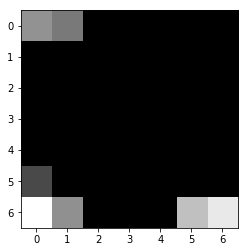

In [15]:
plt.imshow(pred[:,:,:,34].reshape(7,7),cmap='gray')

### We can think of the intermediate outputs as features, the features extracted by the top layers of the model are very abstract and are very difficult to interpret, we can also extract features from lower layers and visualize

In [16]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [17]:
from keras.models import Model
mod=Model(inputs=model1.input,
         outputs=model1.get_layer('block1_conv1').output)

In [24]:
mod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [18]:
pred1=mod.predict(img_pre_processed)

In [19]:
pred1.shape

(1, 224, 224, 64)

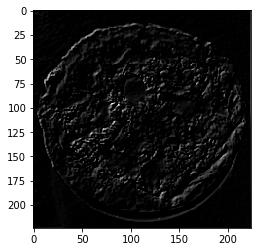

In [20]:
plt.imshow(pred1[:,:,:,0].reshape(224,224),cmap='gray')

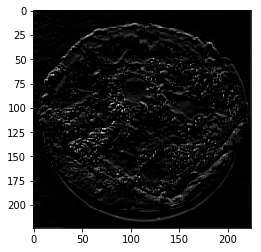

In [23]:
plt.imshow(pred1[:,:,:,10].reshape(224,224),cmap='gray')